In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\pc\OneDrive\Desktop\codes\ASSIG_DATASET\smartcart_customers.csv")

In [3]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,172,88,88,3,8,10,4,7,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,1,6,2,1,1,2,5,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,111,21,42,1,8,2,10,4,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,10,3,5,2,2,0,4,6,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,46,27,15,5,5,3,6,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,42,118,247,2,9,3,4,5,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,8,7,8,2,5,7,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,32,12,24,1,2,3,13,6,0,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,80,30,61,2,6,5,10,3,0,0


In [4]:
df.shape

(2240, 22)

In [5]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Response                0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response'],
      dtype='object')

### data Preprocessing 

In [8]:
# Handale missing values
df["Income"]=df["Income"].fillna(df["Income"].median())

# feature engineering


In [9]:
# age 
df["age"]=2026-df["Year_Birth"]

In [10]:
#customer date
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"],dayfirst=True)
referance_date=df["Dt_Customer"].max()
df["customer_tenure_days"]=(referance_date - df["Dt_Customer"]).dt.days

In [11]:
# spending 
df["Total Spending"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntGoldProds"]+df["MntSweetProducts"]

In [12]:
#children 
df["Toatal_children"]=df["Kidhome"]+df["Teenhome"]

In [13]:
#Education

df["Education"]=df["Education"].replace({ "Basic":"Undergraduate","2n Cycle":"Undergraduate","PhD":"Postgraduate",
                                          "Master":"Postgraduate"})

In [14]:
# Martial status
df["Marital_Status"].value_counts()


Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [15]:
df["Living_Status"]=df["Marital_Status"].replace({
    "Married":"Partner","Together":"Partner", "Single":"Single",  "Divorced" :"Single", "Widow":"Single",
    "Alone":"Single","Absurd":"Single","YOLO":"Single"
    
})

In [16]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'age', 'customer_tenure_days', 'Total Spending',
       'Toatal_children', 'Living_Status'],
      dtype='object')

# Drop Cloumns

In [17]:
cols=['ID',"Year_Birth",'Marital_Status','Kidhome','Teenhome','MntWines','MntFruits',
      'MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds', 'Dt_Customer'
      ]

In [18]:
df_clean=df.drop(columns=cols)

## Handle outliers

In [19]:
col=['Income','Recency','Response','age','Total Spending','Toatal_children']

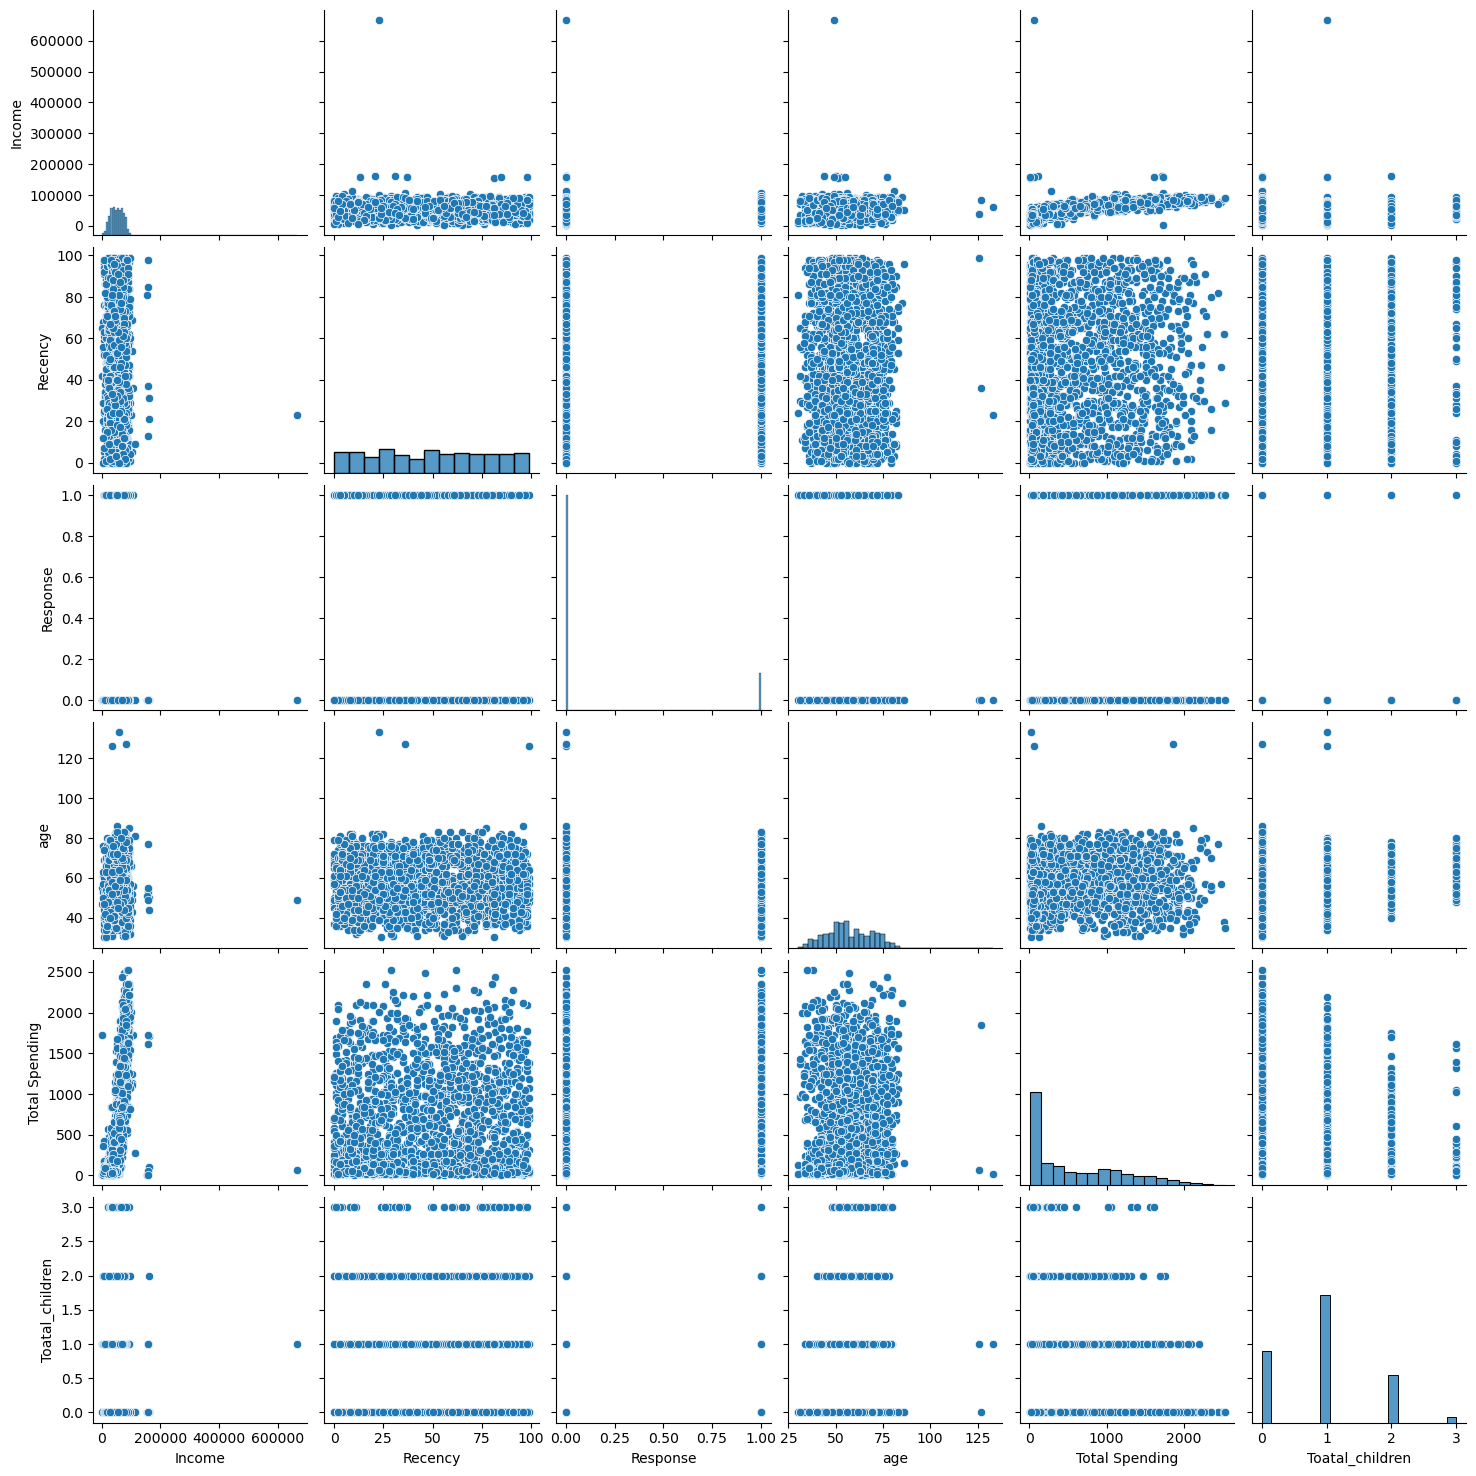

In [20]:
sns.pairplot(df_clean[col])

In [21]:
print("size of a clean_data",len(df_clean))

df_clean=df_clean[df_clean["Income"]<600000]
df_clean=df_clean[df_clean["age"]<90]
print("size of cleaned_data ",len(df_clean))

size of a clean_data 2240
size of cleaned_data  2236


## heatmap

In [22]:
corr=df_clean.corr(numeric_only=True)

<Axes: >

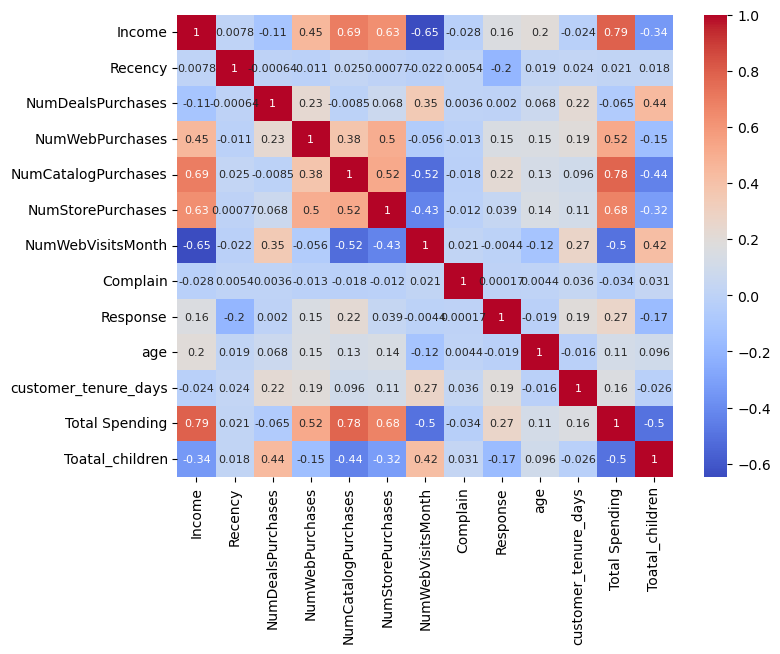

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    cmap="coolwarm",
    annot=True,
    annot_kws={"size":8}
    
)

## Encoding

In [24]:
from sklearn.preprocessing import OneHotEncoder
cols=["Education","Living_Status"]
ohe=OneHotEncoder()
en_cols=ohe.fit_transform(df_clean[cols])


In [25]:
enc_df=pd.DataFrame(en_cols.toarray(),columns=ohe.get_feature_names_out(cols),index=df_clean.index)

In [26]:
enc_df

,Education_Graduation,Education_Postgraduate,Education_Undergraduate,Living_Status_Partner,Living_Status_Single
0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...
2235,1.0,0.0,0.0,1.0,0.0
2236,0.0,1.0,0.0,1.0,0.0
2237,1.0,0.0,0.0,0.0,1.0
2238,0.0,1.0,0.0,1.0,0.0


In [27]:
df_encoded=pd.concat([df_clean.drop(columns=cols),enc_df],axis=1)

In [28]:
X=df_encoded

# scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


In [30]:
X_scaled

array([[ 0.28894655,  0.30685572,  0.34873831, ..., -0.35877969,
        -1.3476353 ,  1.3476353 ],
       [-0.262003  , -0.38397129, -0.16869955, ..., -0.35877969,
        -1.3476353 ,  1.3476353 ],
       [ 0.91842301, -0.7984675 , -0.68613742, ..., -0.35877969,
         0.74204052, -0.74204052],
       ...,
       [ 0.234898  ,  1.44672029, -0.68613742, ..., -0.35877969,
        -1.3476353 ,  1.3476353 ],
       [ 0.80780332, -1.42021181, -0.16869955, ..., -0.35877969,
         0.74204052, -0.74204052],
       [ 0.04280841, -0.31488859,  0.34873831, ..., -0.35877969,
         0.74204052, -0.74204052]], shape=(2236, 18))

## visualize

In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X_scaled)

Text(0.5, 0.92, '3D projection')

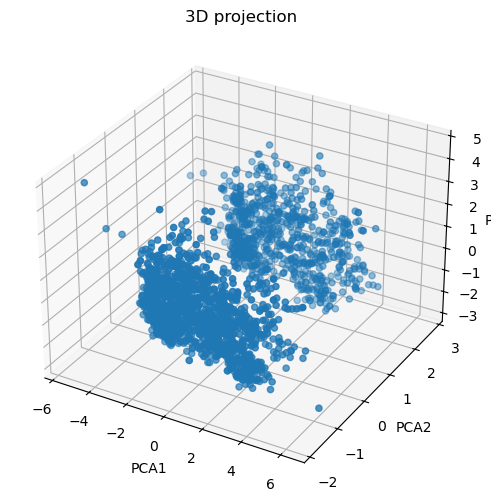

In [32]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2])
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("3D projection")

In [33]:
pca.explained_variance_ratio_

array([0.23163158, 0.11385454, 0.10405815])

## Analyze k value

In [34]:
# k means
from sklearn.cluster import KMeans
from kneed import KneeLocator
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit_predict(X_pca)
    wcss.append(kmeans.inertia_)



In [35]:
knee=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")
optimal_k=knee.elbow
print("optimal_k=",optimal_k)

optimal_k= 4


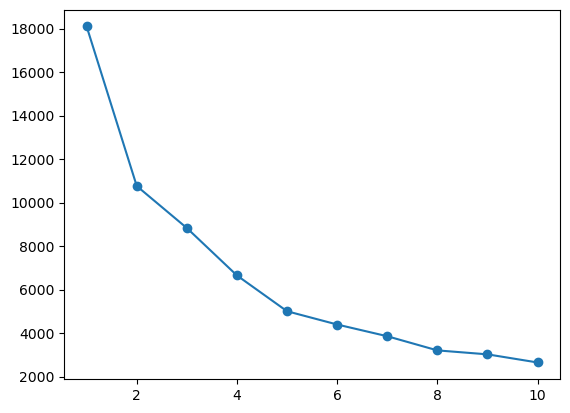

In [36]:
plt.plot(range(1,11),wcss,marker="o")

In [37]:
##2 Silhouette Score
from sklearn.metrics import silhouette_score
scores=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(X_pca)
    score=silhouette_score(X_pca,labels)
    scores.append(score)
  

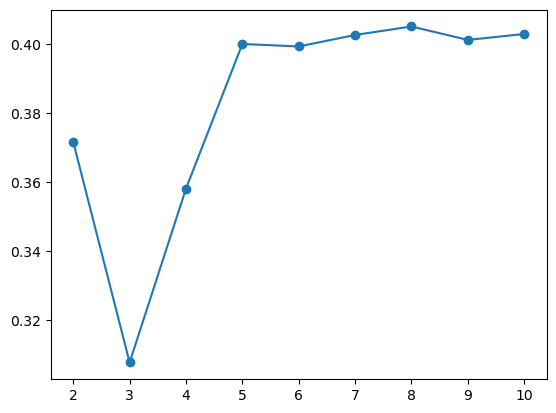

In [38]:
  plt.plot(range(2,11),scores,marker="o")

Text(0, 0.5, 'scores')

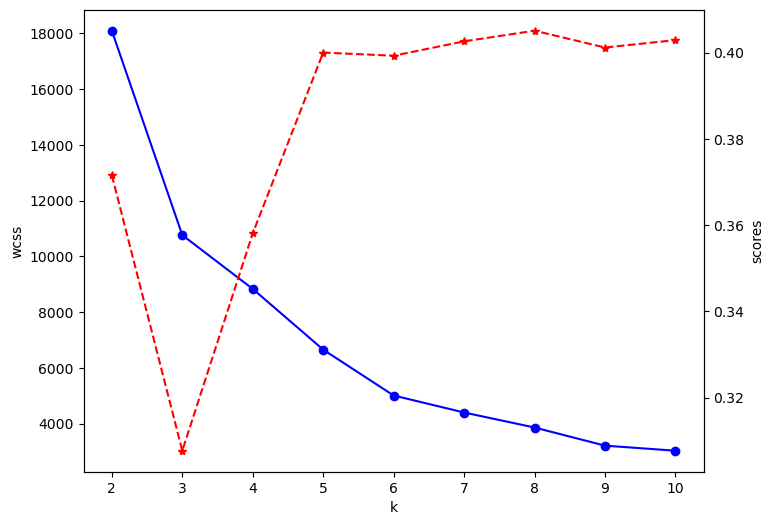

In [39]:
# combined plot
k_range=range(2,11)
fig,ax1=plt.subplots(figsize=(8,6))
ax1.plot(k_range,wcss[:len(k_range)],marker='o',color="blue")
ax1.set_xlabel("k")
ax1.set_ylabel("wcss")

ax2=ax1.twinx()
ax2.plot(k_range,scores[:len(k_range)],marker='*',color="red",linestyle="--")
ax2.set_ylabel("scores")

In [40]:
kmeans=KMeans(n_clusters=4,random_state=42)
labels=kmeans.fit_predict(X_pca)


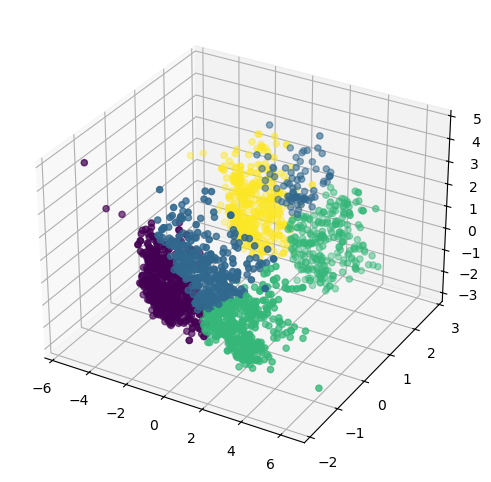

In [41]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels)

In [42]:
from sklearn.cluster import AgglomerativeClustering
agg=AgglomerativeClustering(n_clusters=4,linkage="ward")
labels_agg=agg.fit_predict(X_pca)


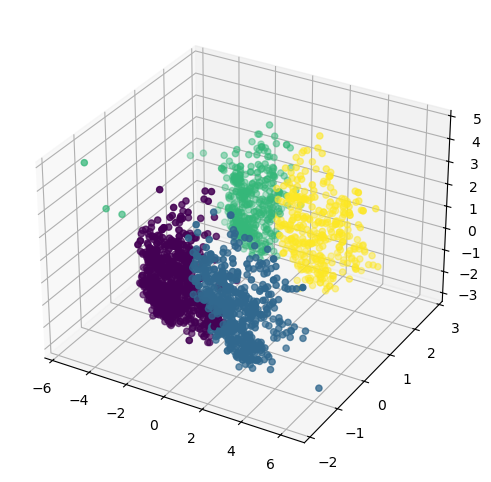

In [43]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(X_pca[:,0],X_pca[:,1],X_pca[:,2],c=labels_agg)

## characterization of clusters

In [44]:

X["clusters"]=labels_agg

<Axes: xlabel='clusters', ylabel='count'>

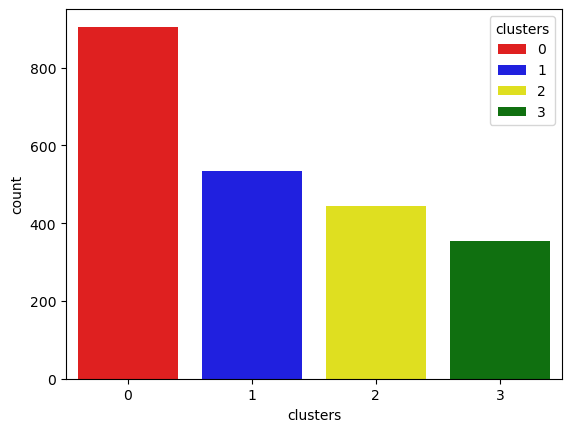

In [48]:
pal=["red","blue","yellow","green"]
sns.countplot(x=X["clusters"],palette=pal,hue=X["clusters"])

<Axes: xlabel='Total Spending', ylabel='Income'>

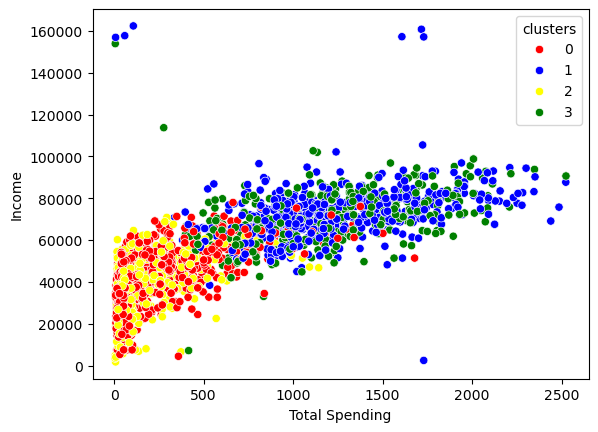

In [46]:
# Income & Spending Patterns
sns.scatterplot(x=X["Total Spending"],y=df_clean["Income"],hue=X["clusters"],
                palette=pal
               )

In [49]:
cluster_summary=X.groupby("clusters").mean()
print(cluster_summary)

                Income    Recency  NumDealsPurchases  NumWebPurchases  \
clusters                                                                
0         39680.580110  48.914917           2.594475         3.153591   
1         72808.445693  49.202247           1.958801         5.687266   
2         36960.143018  48.319820           2.594595         2.713964   
3         70722.681303  50.504249           1.855524         5.790368   

          NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
clusters                                                                        
0                    0.969061           4.143646           6.307182  0.011050   
1                    5.498127           8.659176           3.580524  0.005618   
2                    0.837838           3.623874           6.659910  0.011261   
3                    5.014164           8.430595           3.728045  0.005666   

          Response        age  customer_tenure_days  Total Spending  \
clu